검거율이 낮은 자치구(7개) : 노원구, 동작구, 마포구, 서초구, 양천구, 영등포구, 용산구

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import folium
import requests
import json
import warnings
import seaborn

## 행 열 정리

In [8]:
이용실적 = pd.read_excel('data/안심귀가스카우트이용현황(2015_2021).xlsx', sheet_name='이용실적')
이용실적 = pd.DataFrame(이용실적)
이용실적 = 이용실적.set_index('자치구') # 행 인덱스 이름 부여
이용실적

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
총계,233290,241838,322704,341162,350955,210278,177805
종로구,8861,6970,3789,1438,10097,11445,8586
중구,2935,4901,11110,11931,12658,8861,3570
용산구,4994,6355,8461,8979,9238,5749,2981
성동구,8043,13170,18766,19584,17510,10872,8518
광진구,6533,5990,6183,6206,6099,3215,5733
동대문구,5588,7259,13704,15771,20776,19420,19085
중랑구,8448,7815,8001,10163,14696,8015,6889
성북구,6789,7600,13486,14427,16836,7220,1647


## 년도별 이용자수 시각화

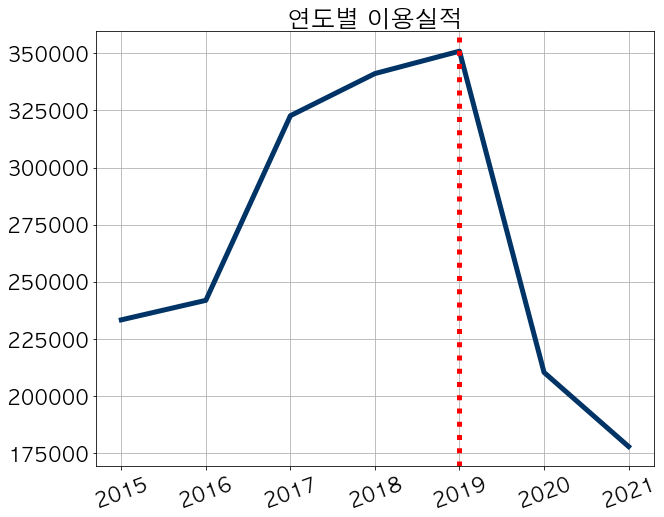

In [9]:
plt.plot(이용실적.loc['총계'], color='#003366', linewidth=5)
plt.title("연도별 이용실적")
plt.xticks(rotation = 20)
plt.axvline(2019, color='r', linestyle=':', linewidth=5)
plt.rcParams["font.family"] = "AppleGothic"
# plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,8)
plt.grid(True)
plt.show()

시스템 도입 이후 꾸준한 상승세를 보이다 2019년을 기준으로 하락하고 있다.
http://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0002747276
참고 기사
-> 개선 정책 필요(예산 지원, 시스템 강화 등)

### 안심귀가스카우트 이용률은 범죄율과 관련이 있을까???

In [10]:
# 데이터 정리
범죄발생현황 = pd.read_excel('data/범죄발생현황.xlsx')
warnings.filterwarnings(action='ignore')
pd.DataFrame(범죄발생현황)
범죄발생현황.rename(columns = {
    '2015' : '2015_발생',
    '2015.1' : '2015_검거',
     '2016' : '2016_발생',
    '2016.1' : '2016_검거',
     '2017' : '2017_발생',
    '2017.1' : '2017_검거',
     '2018' : '2018_발생',
    '2018.1' : '2018_검거',
     '2019' : '2019_발생',
    '2019.1' : '2019_검거',
     '2020' : '2020_발생',
    '2020.1' : '2020_검거',
     '2021' : '2021_발생',
    '2021.1' : '2021_검거'
                        }, inplace = True)
범죄발생현황 = 범죄발생현황.drop(범죄발생현황.index[0])
범죄발생현황

,자치구별,2015_발생,2015_검거,2016_발생,2016_검거,2017_발생,2017_검거,2018_발생,2018_검거,2019_발생,2019_검거,2020_발생,2020_검거,2021_발생,2021_검거
1,소계,126401,82680,117839,84421,107835,79865,101948,74487,103668,74805,92679,66548,80445,58012
2,종로구,4705,4430,4459,4298,4057,4437,3690,3913,3846,4117,3102,3343,2712,2755
3,중구,4954,2942,4584,3068,4184,2851,4030,2679,4327,2804,3411,2323,2861,2072
4,용산구,3820,2483,4137,2835,4060,2936,3411,2543,3313,2611,2969,2056,2381,1659
5,성동구,3358,2123,3026,2392,2767,2031,2457,1787,2512,1838,2362,1774,2112,1510
6,광진구,5909,3707,5322,3312,4646,3289,3915,2789,4011,2816,3601,2511,3087,2202
7,동대문구,4720,3205,4787,3623,3975,3274,3680,2968,3692,2818,3401,2465,2959,2113
8,중랑구,5193,3405,5041,3935,4571,3392,4288,3222,4268,3138,3726,2781,3210,2405
9,성북구,4154,2729,3744,2672,3434,2479,3042,2277,2877,2323,2567,1947,2411,1787
10,강북구,4257,3113,4229,3323,3393,2824,3437,2743,3838,3023,2770,2259,2301,1912


In [11]:
범죄발생건 = 범죄발생현황[['2015_발생', '2016_발생', '2017_발생', '2018_발생', '2019_발생', '2020_발생', '2021_발생']]
범죄발생건.rename(index={
        1: "소계",
        2: "종로구",
        3: "중구",
        4: "용산구",
        5: "성동구",
        6: "광진구",
        7: "동대문구",
        8: "중랑구",
        9: "성북구",
        10: "강북구",
        11: "도봉구",
        12: "노원구",
        13: "은평구",
        14: "서대문구",
        15: "마포구",
        16: "양천구",
        17: "강서구",
        18: "구로구",
        19: "금천구",
        20: "영등포구",
        21: "동작구",
        22: "관악구",
        23: "서초구",
        24: "강남구",
        25: "송파구",
        26: "강동구"
    }, inplace = True)
범죄발생건

,2015_발생,2016_발생,2017_발생,2018_발생,2019_발생,2020_발생,2021_발생
소계,126401,117839,107835,101948,103668,92679,80445
종로구,4705,4459,4057,3690,3846,3102,2712
중구,4954,4584,4184,4030,4327,3411,2861
용산구,3820,4137,4060,3411,3313,2969,2381
성동구,3358,3026,2767,2457,2512,2362,2112
광진구,5909,5322,4646,3915,4011,3601,3087
동대문구,4720,4787,3975,3680,3692,3401,2959
중랑구,5193,5041,4571,4288,4268,3726,3210
성북구,4154,3744,3434,3042,2877,2567,2411
강북구,4257,4229,3393,3437,3838,2770,2301


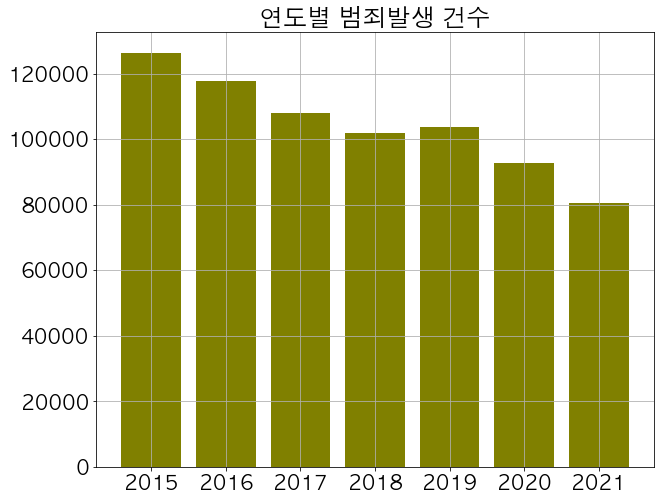

In [12]:
범죄발생소계 = 범죄발생건.iloc[0]
x = np.arange(2015, 2022)
y = 범죄발생소계.values
plt.bar(x, y, color='olive')
plt.rcParams["font.family"] = "AppleGothic"
# plt.rcParams["font.family"] = "Malgun Gothic"
plt.grid(True)
plt.title("연도별 범죄발생 건수")
plt.show()

전체적으로 줄어들고 있음. 그럼 이 두 데이터를 합쳐보자 !!

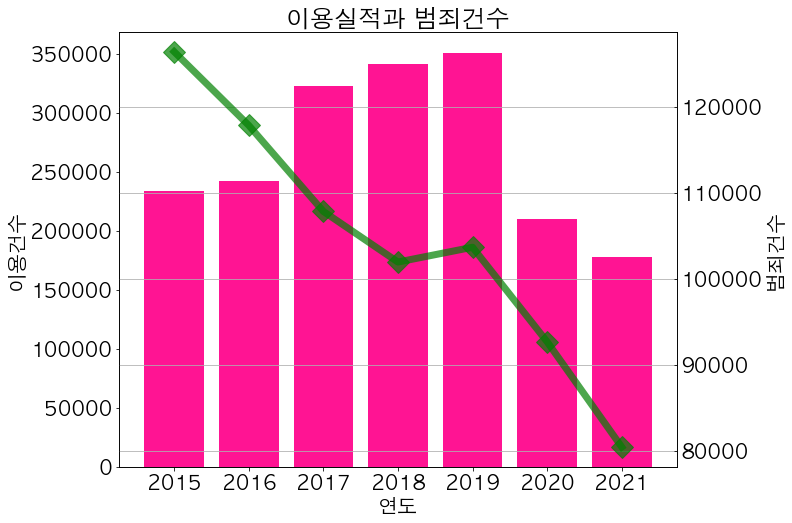

In [13]:
# 데이터 합치기 ~~~
fig, ax1 = plt.subplots()
ax1.bar(x, 이용실적.loc['총계'], color='deeppink', label='이용실적') # 이용실적

ax1.set_xlabel('연도')
ax1.set_ylabel('이용건수')

ax2 = ax1.twinx()
ax2.plot(x, y, color='green', linestyle='-', marker='D', markersize=15, linewidth=7, alpha=0.7, label='범죄건수') # 범죄발생 건수
ax2.set_ylabel('범죄건수')
ax2.tick_params(axis='y', direction='in')

plt.grid(True)
plt.title("이용실적과 범죄건수")
plt.show()

그려지는 형태가 아주 똑같다곤 할 수 없지만 연도가 지남에 따라 이용 건수도 범죄 발생건수과 함께 떨어지고 있음을 알 수 있다.

## 자치구별 이용실적 지도에 표시
상위 7개구 하위 7개구 뽑아서 지도에 출력

In [25]:
dt = 이용실적['자치구별총계']
dt = dt.drop(dt.index[0])
dt

자치구
종로구      51186
중구       55966
용산구      46757
성동구      96463
광진구      39959
동대문구    101603
중랑구      64027
성북구      68005
강북구      95876
도봉구      54021
노원구      50450
은평구      64373
서대문구     63788
마포구      36989
양천구      49169
강서구      40611
구로구      84325
금천구     113540
영등포구     66883
동작구     111744
관악구     104286
서초구     184177
강남구      40505
송파구     100689
강동구      92640
Name: 자치구별총계, dtype: int64

In [29]:
# 서울시 행정구역 json raw 파일 load
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
r = requests.get(geo_json)
c = r.content
seoul = json.loads(c)

In [30]:
# 색상 차이 두어 지도로 시각화
seoul_map = folium.Map(location = [37.5679234, 126.9779478], zoom_start = 11)
folium.GeoJson(seoul, name='지역구').add_to(seoul_map)
folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data=dt,
    fill_color='BuPu',
    fill_opacity = 0.5,
    line_opacity = 0.2,
    key_on = 'properties.name',
    legend_name = '지역구별 이용실적'
).add_to(seoul_map)
seoul_map

## 이용실적과 스카우트 인원수는 비례하는지 분석하기

In [32]:
# 자치구별 2015~2021 총 이용 실적 구해서 새로운 컬럼으로 지정
이용실적['자치구별총계'] = 이용실적.sum(axis=1)
이용실적

,2015,2016,2017,2018,2019,2020,2021,자치구별총계
자치구,,,,,,,,
총계,233290,241838,322704,341162,350955,210278,177805,5634096
종로구,8861,6970,3789,1438,10097,11445,8586,153558
중구,2935,4901,11110,11931,12658,8861,3570,167898
용산구,4994,6355,8461,8979,9238,5749,2981,140271
성동구,8043,13170,18766,19584,17510,10872,8518,289389
광진구,6533,5990,6183,6206,6099,3215,5733,119877
동대문구,5588,7259,13704,15771,20776,19420,19085,304809
중랑구,8448,7815,8001,10163,14696,8015,6889,192081
성북구,6789,7600,13486,14427,16836,7220,1647,204015


In [27]:
# 필요한 데이터셋 만들기

# 이용실적이 높은 7개 자치구  ( 서초구 ~ 성동구 )
이용실적정렬 = 이용실적.sort_values(by=['자치구별총계'], ascending=False)
상위7개구 = 이용실적정렬.drop(이용실적정렬.index[0])
상위7개구 = 상위7개구.head(7)
상위7개구 = pd.DataFrame(상위7개구)
상위7개구.drop(['자치구별총계'], axis=1, inplace=True)

# 이용실적이 낮은 7개 자치구 데이터화 ( 마포구 ~ 노원구 )
이용실적정렬 = 이용실적.sort_values(by=['자치구별총계'], ascending=False)
하위7개구 = 이용실적정렬.drop(이용실적정렬.index[0])
하위7개구 = 하위7개구.tail(7)
하위7개구 = pd.DataFrame(하위7개구)
하위7개구.drop(['자치구별총계'], axis=1, inplace=True)


상위7개구

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
서초구,22185,15102,34498,51088,43556,9483,8265
금천구,18323,17781,18509,18343,17946,12893,9745
동작구,8350,15268,19935,18431,18766,14233,16761
관악구,18463,14403,15918,16706,15730,10286,12780
동대문구,5588,7259,13704,15771,20776,19420,19085
송파구,24221,13297,11019,9401,9309,13992,19450
성동구,8043,13170,18766,19584,17510,10872,8518


In [28]:
스카우트인원 = pd.read_excel('data/안심귀가스카우트이용현황(2015_2021).xlsx', sheet_name='스카우트인원')
스카우트인원 = pd.DataFrame(스카우트인원)
스카우트인원 = 스카우트인원.set_index('자치구')
스카우트인원.drop(['총계'], inplace=True)
스카우트인원

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
종로구,19,21,11,11,11,14,14
중구,11,7,15,17,17,20,16
용산구,11,11,13,13,13,13,13
성동구,15,17,23,23,23,23,19
광진구,13,11,11,11,11,13,13
동대문구,11,13,21,21,21,21,17
중랑구,13,17,13,17,17,17,17
성북구,15,13,21,23,23,26,27
강북구,19,23,23,25,25,25,25


#### 이용실적이 높은 5개 자치구와 그 자치구의 스카우트 인원수는 비례하는지

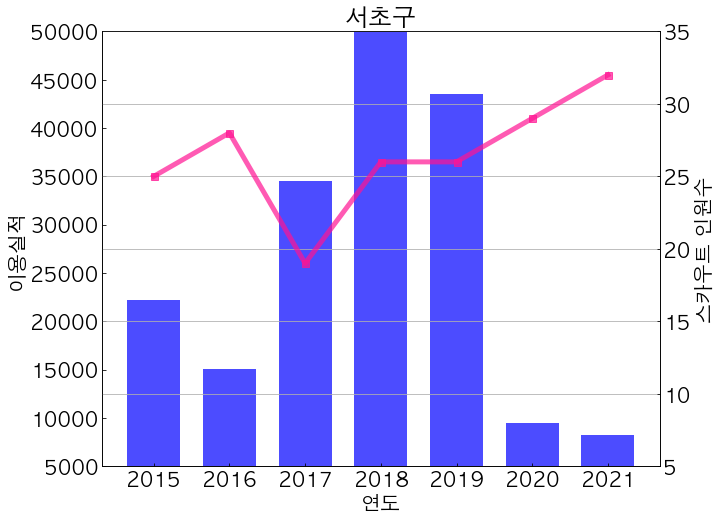

In [18]:
fig, ax1 = plt.subplots()
ax1.bar(상위7개구.columns, 상위7개구.iloc[0].values, color='blue', alpha=0.7, width=0.7)
ax1.set_ylim(5000, 50000)
ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('연도')
ax1.set_ylabel('이용실적')

ax2 = ax1.twinx()
ax2.plot(상위7개구.columns, 스카우트인원.iloc[-4].values, '-s', color='deeppink', markersize=7, linewidth=5, alpha=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('스카우트 인원수')
ax2.set_ylim(5, 35)
plt.grid(True)

plt.title("서초구")
plt.show()

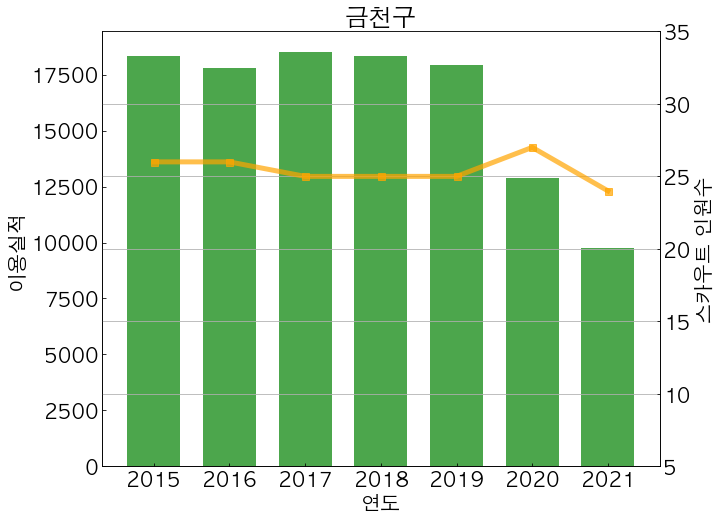

In [19]:
fig, ax1 = plt.subplots()
ax1.bar(상위7개구.columns, 상위7개구.iloc[1].values, color='green', alpha=0.7, width=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('연도')
ax1.set_ylabel('이용실적')
ax2.set_ylim(5000, 25000)

ax2 = ax1.twinx()
ax2.plot(상위7개구.columns, 스카우트인원.iloc[-8].values, '-s', color='orange', markersize=7, linewidth=5, alpha=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('스카우트 인원수')
ax2.set_ylim(5, 35)
plt.grid(True)

plt.title("금천구")
plt.show()

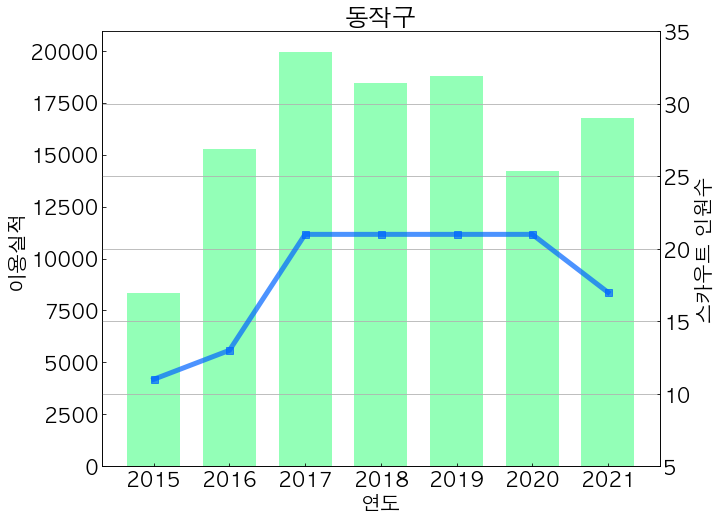

In [20]:
# 동작구
fig, ax1 = plt.subplots()
ax1.bar(상위7개구.columns, 상위7개구.iloc[2].values, color='#66ff99', alpha=0.7, width=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('연도')
ax1.set_ylabel('이용실적')

ax2 = ax1.twinx()
ax2.plot(상위7개구.columns, 스카우트인원.iloc[5].values, '-s', color='#0066ff', markersize=7, linewidth=5, alpha=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('스카우트 인원수')
ax2.set_ylim(5, 35)
plt.grid(True)

plt.title("동작구")
plt.show()

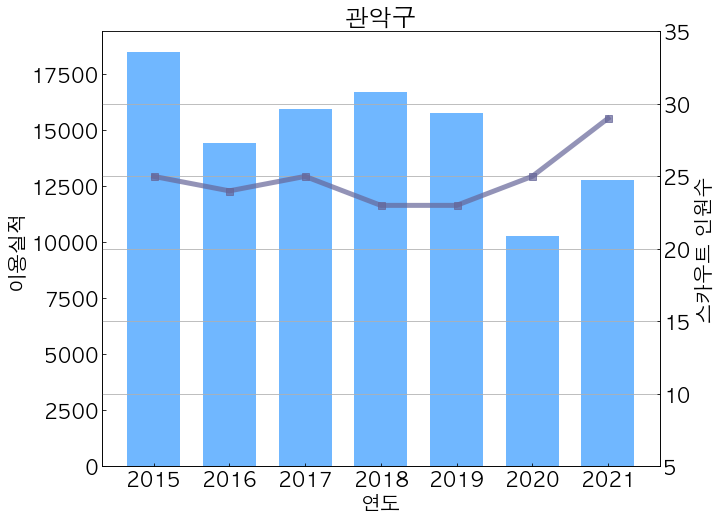

In [21]:
# 관악구
fig, ax1 = plt.subplots()
ax1.bar(상위7개구.columns, 상위7개구.iloc[3].values, color='#3399ff', alpha=0.7, width=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('연도')
ax1.set_ylabel('이용실적')

ax2 = ax1.twinx()
ax2.plot(상위7개구.columns, 스카우트인원.iloc[-5].values, '-s', color='#666699', markersize=7, linewidth=5, alpha=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('스카우트 인원수')
ax2.set_ylim(5, 35)
plt.grid(True)

plt.title("관악구")
plt.show()

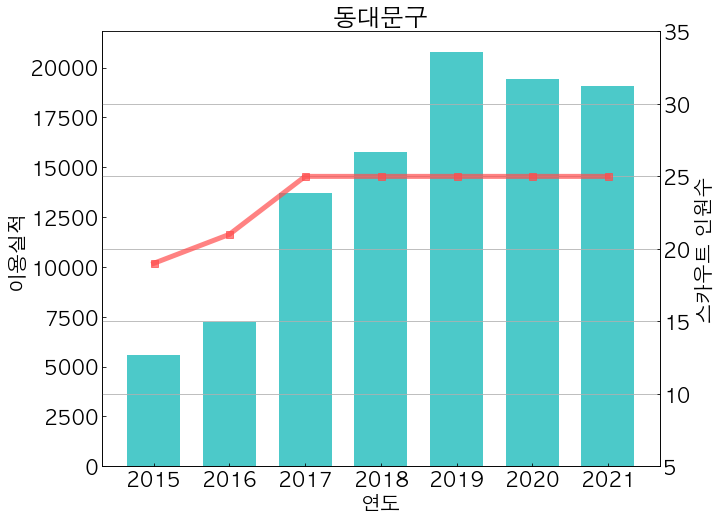

In [22]:
# 동대문구
fig, ax1 = plt.subplots()
ax1.bar(상위7개구.columns, 상위7개구.iloc[4].values, color='#00b3b3', alpha=0.7, width=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('연도')
ax1.set_ylabel('이용실적')

ax2 = ax1.twinx()
ax2.plot(상위7개구.columns, 스카우트인원.iloc[-6].values, '-s', color='#ff4d4d', markersize=7, linewidth=5, alpha=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('스카우트 인원수')
ax2.set_ylim(5, 35)
plt.grid(True)

plt.title("동대문구")
plt.show()

------------------------------------------------------------

In [23]:
data = 이용실적.drop(이용실적.index[0])
data = data.drop(['자치구별총계'], axis=1)
data

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
종로구,8861,6970,3789,1438,10097,11445,8586
중구,2935,4901,11110,11931,12658,8861,3570
용산구,4994,6355,8461,8979,9238,5749,2981
성동구,8043,13170,18766,19584,17510,10872,8518
광진구,6533,5990,6183,6206,6099,3215,5733
동대문구,5588,7259,13704,15771,20776,19420,19085
중랑구,8448,7815,8001,10163,14696,8015,6889
성북구,6789,7600,13486,14427,16836,7220,1647
강북구,10507,13833,17368,18446,18282,10573,6867


In [24]:
# 각 연도의 평균 건수 행 추가
data.loc[26] = data.mean().values
data.rename(index={26: "평균"}, inplace=True)
data

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
종로구,8861.0,6970.00,3789.00,1438.00,10097.0,11445.00,8586.0
중구,2935.0,4901.00,11110.00,11931.00,12658.0,8861.00,3570.0
용산구,4994.0,6355.00,8461.00,8979.00,9238.0,5749.00,2981.0
성동구,8043.0,13170.00,18766.00,19584.00,17510.0,10872.00,8518.0
광진구,6533.0,5990.00,6183.00,6206.00,6099.0,3215.00,5733.0
동대문구,5588.0,7259.00,13704.00,15771.00,20776.0,19420.00,19085.0
중랑구,8448.0,7815.00,8001.00,10163.00,14696.0,8015.00,6889.0
성북구,6789.0,7600.00,13486.00,14427.00,16836.0,7220.00,1647.0
강북구,10507.0,13833.00,17368.00,18446.00,18282.0,10573.00,6867.0
